In [1]:
import pandas as pd
import numpy as np
import os
import cv2 ,cv
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
data_dir = 'Dataset'
age =[]
gender =[]
images =[]
for filename in os.listdir(data_dir) : 
    img_path = os.path.join(data_dir,filename)
    temp = filename.split('_')
    age_ = temp[0]
    gender_ = temp[1]
    try : 
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        age.append(age_)
        gender.append(gender_)
        
    except Exception as e :
        print("Image kharab hai")
        
age = np.array(age)
gender = np.array(gender)

gender is 0 and age is 100


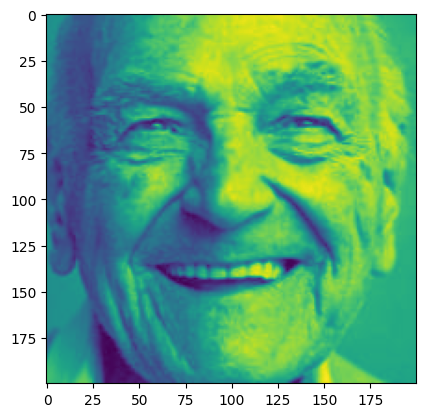

In [3]:
images = np.array(images)
images_aug = images/255
plt.imshow(images_aug[1])
print(f"gender is {gender[1]} and age is {age[1]}")

dictionary = {0 : 'Male' , 1: 'Female'}

C:\Users\shrey\AppData\Local\Temp\ipykernel_6292\2133589328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age)


<Axes: ylabel='Density'>

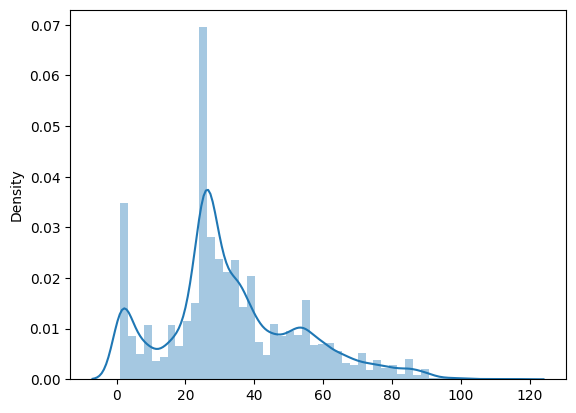

In [4]:
sns.distplot(age)

In [7]:
print(age.shape)
print(gender.shape)

(23708,)
(23708,)


 age is 10 and gneder is 0


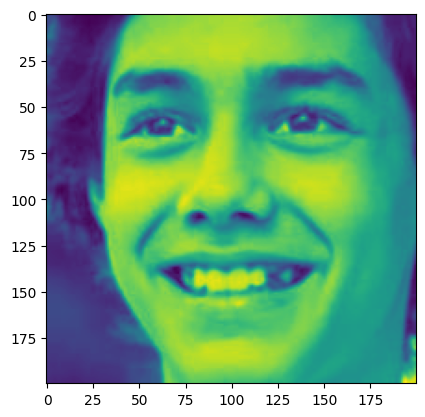

In [10]:
images_aug[4].min()
plt.imshow(images_aug[100])
print(f" age is {age[100]} and gneder is {gender[100]}")

In [40]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import layers ,Model , regularizers
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten ,Input

In [41]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import tensorflow as tf

inputs = Input((200, 200, 1))

conv1 = Conv2D(40, (3, 3), activation='relu')(inputs)
max1 = MaxPooling2D()(conv1)

conv2 = Conv2D(32, (2, 2), activation='relu')(max1)
max2 = MaxPooling2D()(conv2)

conv3 = Conv2D(64, (2, 2), activation='relu')(max2)
max3 = MaxPooling2D()(conv3)

conv4 = Conv2D(64, (2, 2), strides=1, activation='relu')(max3)
max4 = MaxPooling2D()(conv4)

flat = Flatten()(max4)

# Gender
d1_1 = Dense(8, activation='relu')(flat)
d1_2 = Dense(1, activation='sigmoid', name='gender_output')(d1_1)

# Age
d2_1 = Dense(8, activation='relu')(flat)
d2_2 = Dense(1, activation='relu', name='age_output')(d2_1)

model = Model(inputs=[inputs], outputs=[d1_2, d2_2])
model.compile(loss=['binary_crossentropy', 'mse'], optimizer='adam', metrics=['accuracy', 'mae'])


In [28]:
from tensorflow.keras.utils import plot_model
import graphviz
import pydot

In [29]:
plot_model(model)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 198, 198, 40)         400       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 99, 99, 40)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                            

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'images', 'gender', and 'age' are your data arrays
X_trainval, X_test, g_trainval, g_test = train_test_split(images_aug, gender, test_size=0.2, random_state=42)
X_trainval, X_test, a_trainval, a_test = train_test_split(images_aug, age, test_size=0.2, random_state=42)

X_train, X_val, g_train, g_val = train_test_split(X_trainval, g_trainval, test_size=0.2, random_state=42)
X_train, X_val, a_train, a_val = train_test_split(X_trainval, a_trainval, test_size=0.2, random_state=42)

# Explicitly cast age labels to float
a_train = np.asarray(a_train, dtype=np.float32)
a_val = np.asarray(a_val, dtype=np.float32)





In [45]:
g_train = np.asarray(g_train, dtype=np.float32)
g_val = np.asarray(g_val, dtype=np.float32)

age is 45.0 , and gender is 1.0


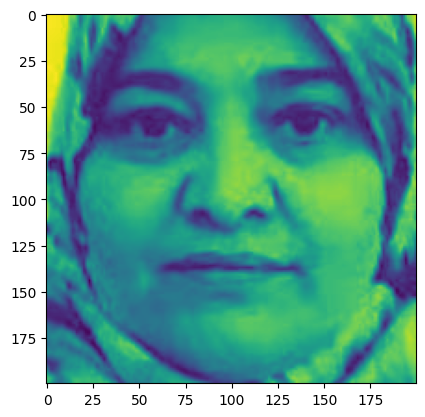

In [48]:
plt.imshow(X_train[51])
print(f"age is {a_train[51]} , and gender is {g_train[51]}")

In [13]:
history = model.fit(X_train , [g_train,a_train], epochs = 30 ,validation_data = (X_val , [g_val,a_val]) )

Epoch 1/30
475/475 [==============================] - 348s 727ms/step - loss: 410.7317 - gender_output_loss: 0.6926 - age_output_loss: 410.0391 - gender_output_accuracy: 0.5214 - gender_output_mae: 0.4993 - age_output_accuracy: 0.0484 - age_output_mae: 15.5434 - val_loss: 263.7315 - val_gender_output_loss: 0.6928 - val_age_output_loss: 263.0387 - val_gender_output_accuracy: 0.5129 - val_gender_output_mae: 0.4996 - val_age_output_accuracy: 0.0443 - val_age_output_mae: 12.2657
Epoch 2/30
475/475 [==============================] - 333s 701ms/step - loss: 242.7751 - gender_output_loss: 0.6858 - age_output_loss: 242.0894 - gender_output_accuracy: 0.5247 - gender_output_mae: 0.4929 - age_output_accuracy: 0.0469 - age_output_mae: 11.9580 - val_loss: 219.8842 - val_gender_output_loss: 0.6248 - val_age_output_loss: 219.2595 - val_gender_output_accuracy: 0.5129 - val_gender_output_mae: 0.4360 - val_age_output_accuracy: 0.0409 - val_age_output_mae: 10.9117
Epoch 3/30
475/475 [====================

In [34]:
import joblib 


In [49]:
yhat = model.predict(X_test)

149/149 [==============================] - 25s 167ms/step


In [50]:
yhat = np.array(yhat)
yhat.shape

(2, 4742, 1)

In [51]:
yhat= yhat.reshape(2,4742)
yhat.shape

(2, 4742)

In [52]:
yhat = np.round(yhat)
yhat[1,:]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

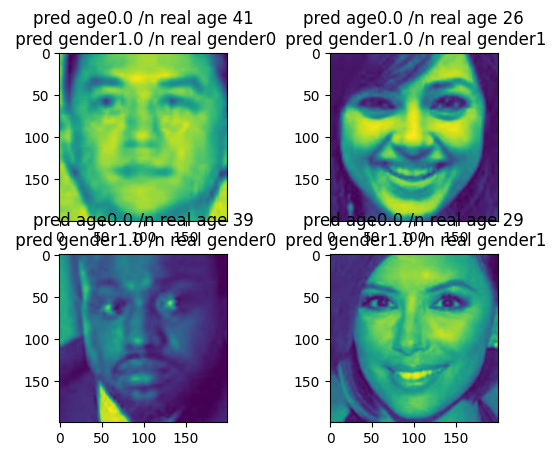

In [53]:
for i in range(4) : 
    
    plt.subplot(2,2 ,i+1)
    plt.imshow(X_test[i+5])
    plt.title(f"pred age{yhat[1,i+5]} /n real age {a_test[i+5]}\n pred gender{yhat[0,i+5]} /n real gender{g_test[i+5]}")

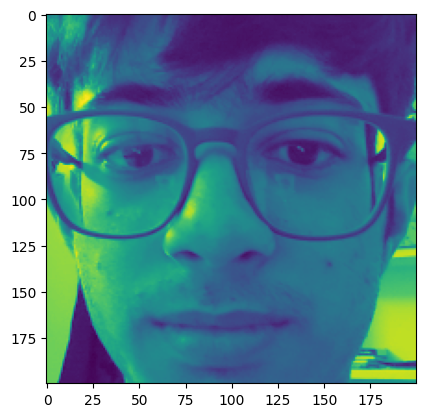

In [55]:
images_ =[]
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_2 = cv2.imread('girl2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
img_3 = cv2.imread('girl3.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
img_4 = cv2.imread('girl4.jpg')
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2GRAY)
img_5 = cv2.imread('girl5.jpg')
img_5 = cv2.cvtColor(img_5, cv2.COLOR_BGR2GRAY)
img_6 = cv2.imread('girl6.jpg')
img_6 = cv2.cvtColor(img_6, cv2.COLOR_BGR2GRAY)
img_7 = cv2.imread('img2.png')
img_7 = cv2.cvtColor(img_7, cv2.COLOR_BGR2GRAY)
img_8 = cv2.imread('joshi.jpg')
img_8 = cv2.cvtColor(img_8, cv2.COLOR_BGR2GRAY)
img_9 = cv2.imread('ayush.jpg')
img_9 = cv2.cvtColor(img_9, cv2.COLOR_BGR2GRAY)
img_10 = cv2.imread('me.jpg')
img_10 = cv2.cvtColor(img_10, cv2.COLOR_BGR2GRAY)
img_11 = cv2.imread('me1.jpg')
img_11 = cv2.cvtColor(img_11, cv2.COLOR_BGR2GRAY)

images_.append([img,img_2,img_3,img_4,img_5,img_6,img_7,img_8,img_9,img_10,img_11])
images_ = np.array(images_)
images_ =images_.reshape(11,200,200)
images_ =images_/255
plt.imshow(images_[9])

1/1 [==============================] - 0s 133ms/step


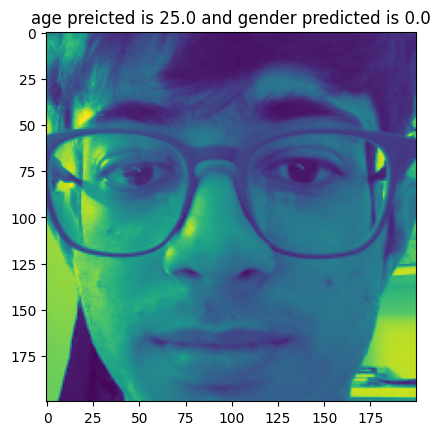

In [58]:
pred =model_2.predict(images_)
pred=np.array(pred)
pred = pred.reshape(2,11)
pred = pred.round()
pred
plt.title(f"age predicted is {pred[1,9]} and gender predicted is {pred[0,9]}")
plt.imshow(images_[9])

In [1]:
import joblib
model_1 = joblib.load('age_gender.pkl') 
model_2 = joblib.load('age_gender_1.pkl') 

In [46]:
yhat_pred_1 = model_1.predict(X_test)
yhat_pred_2 = model_2.predict(X_test)

yhat_pred_1 =np.array(yhat_pred_1)
yhat_pred_2 =np.array(yhat_pred_2)



149/149 [==============================] - 26s 173ms/step


In [47]:
yhat_pred_1 =yhat_pred_1.reshape(2, 4742)
yhat_pred_2 =yhat_pred_2.reshape(2, 4742)

yhat_pred_1 = yhat_pred_1.round()
yhat_pred_2 = yhat_pred_2.round()
print(yhat_pred_1[:,8] , yhat_pred_2[:,8])
yhat_pred_1.shape

[ 0. 23.] [ 1. 31.]


(2, 4742)

In [36]:
for i in range(len(yhat_pred_1[0,:])) : 
    print(f"gender and age by m1 {yhat_pred_1[0,i]}, {yhat_pred_1[1,i]}  real gender and age is{g_test[i]} , {a_test[i]} ")

gender and age by m1 0.0, 22.0  real gender and age is1 , 49 
gender and age by m1 0.0, 21.0  real gender and age is1 , 17 
gender and age by m1 0.0, 23.0  real gender and age is1 , 17 
gender and age by m1 0.0, 22.0  real gender and age is0 , 29 
gender and age by m1 0.0, 24.0  real gender and age is1 , 26 
gender and age by m1 0.0, 23.0  real gender and age is0 , 41 
gender and age by m1 0.0, 22.0  real gender and age is1 , 26 
gender and age by m1 0.0, 21.0  real gender and age is0 , 39 
gender and age by m1 0.0, 23.0  real gender and age is1 , 29 
gender and age by m1 0.0, 24.0  real gender and age is1 , 1 
gender and age by m1 0.0, 23.0  real gender and age is1 , 63 
gender and age by m1 0.0, 22.0  real gender and age is1 , 28 
gender and age by m1 0.0, 23.0  real gender and age is0 , 73 
gender and age by m1 0.0, 23.0  real gender and age is1 , 18 
gender and age by m1 0.0, 24.0  real gender and age is1 , 28 
gender and age by m1 0.0, 24.0  real gender and age is1 , 23 
gender an

In [38]:
for i in range(len(yhat_pred_2[0,:])) : 
    print(f"gender and age by m2 {yhat_pred_2[0,i]}, {yhat_pred_2[1,i]}  real gender and age is{g_test[i]} , {a_test[i]} ")

gender and age by m2 0.0, 59.0  real gender and age is1 , 49 
gender and age by m2 1.0, 17.0  real gender and age is1 , 17 
gender and age by m2 1.0, 15.0  real gender and age is1 , 17 
gender and age by m2 0.0, 32.0  real gender and age is0 , 29 
gender and age by m2 1.0, 62.0  real gender and age is1 , 26 
gender and age by m2 0.0, 29.0  real gender and age is0 , 41 
gender and age by m2 1.0, 25.0  real gender and age is1 , 26 
gender and age by m2 0.0, 21.0  real gender and age is0 , 39 
gender and age by m2 1.0, 31.0  real gender and age is1 , 29 
gender and age by m2 1.0, 0.0  real gender and age is1 , 1 
gender and age by m2 1.0, 37.0  real gender and age is1 , 63 
gender and age by m2 1.0, 31.0  real gender and age is1 , 28 
gender and age by m2 0.0, 67.0  real gender and age is0 , 73 
gender and age by m2 1.0, 20.0  real gender and age is1 , 18 
gender and age by m2 1.0, 23.0  real gender and age is1 , 28 
gender and age by m2 1.0, 19.0  real gender and age is1 , 23 
gender and

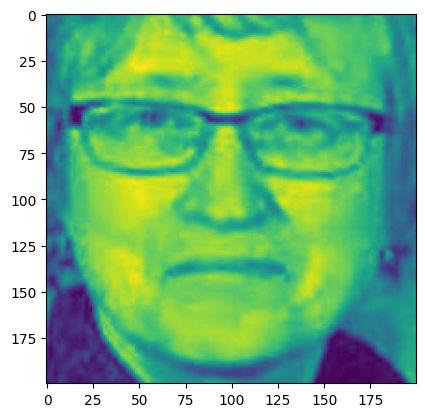

In [37]:
plt.imshow(X_test[0])

In [62]:
from sklearn.metrics import r2_score
sc_1 = r2_score([yhat_pred_1[0,:],yhat_pred_1[1,:]] ,[g_test ,a_test])
sc_2 = r2_score([yhat_pred_2[0,:],yhat_pred_2[1,:]] , [g_test ,a_test])

print(sc_1,sc_2)

-6.932074433352024 -2.4862986950310866


In [61]:
a_test =np.asarray(a_test ,dtype = 'float32')
g_test =np.asarray(a_test ,dtype = 'float32')

In [110]:
test = X_test[30:47]
a_test_1 = a_train[30:47]
g_test_2 = g_train[30:47]

In [111]:
y_pred = model_2.predict(X_test[30:47])
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(2,17)

1/1 [==============================] - 0s 165ms/step


In [112]:
y_pred_1 = model_2.predict(test)
y_pred_1 = np.array(y_pred)
y_pred_1 = y_pred.reshape(2,17)

y_pred =y_pred.round()
y_pred_1 =y_pred_1.round()

y_pred = np.asarray(y_pred,dtype = 'int32')
y_pred_1 = np.asarray(y_pred_1 , dtype = 'int32')

1/1 [==============================] - 0s 175ms/step


In [113]:
for i in range(17) :
    print(y_pred[:,i] , y_pred_1[:,i])

[ 0 33] [ 0 33]
[ 1 21] [ 1 21]
[ 1 48] [ 1 48]
[ 0 29] [ 0 29]
[ 1 63] [ 1 63]
[ 1 32] [ 1 32]
[ 1 15] [ 1 15]
[ 1 15] [ 1 15]
[ 1 49] [ 1 49]
[ 0 59] [ 0 59]
[1 3] [1 3]
[ 1 38] [ 1 38]
[ 1 49] [ 1 49]
[ 1 22] [ 1 22]
[0 0] [0 0]
[ 1 33] [ 1 33]
[0 4] [0 4]


In [105]:
from PIL import Image
for i in range(17) : 
    str_ = "img_"+str(i+1)+".JPEG"
    cv2.imwrite(str_, X_test[30+i]*255)

In [59]:
# img_sir = cv2.imread('sir.png')
# img_sir = cv2.cvtColor(img_sir, cv2.COLOR_BGR2GRAY)

# img =[]
# img.append(img_sir/255)
# img = np.asarray(img,dtype='float32')

# pred = model_2.predict(img)

# pred = np.array(pred)
# pred.reshape(2,1)
# pred = pred.round()
# plt.title(f"age predicted is {pred[1,0]} and gender predicted is {pred[0,0]}")
# plt.imshow(img[0])
